# Image Scraping & Classification Using CNN
By : Mohamed Mamdouh Elaghory

________

We'll Scraping the 5 categories of traffic signs from google then save each one in folder, then build a CNN using Keras to use it classifying these five categories.

### **About Dataset**

#### **Context**
The dataset contains less than 1000 images of five types of traffic signs. It is further classified into 5 different classes. The dataset is high varying, some of the classes have many images while some classes have few images. 

#### **Content**
**Note**   The Accuracy is not good due to lack of data, but just here I want to proof of concept, not more.

{ 'stop trafic sign' -> 0,

'road narrows on both sides sign'    --> 1,

'two-way traffic sign'   --> 2,

'roundabout sign'  --> 3,

'no pedestrians sign'       --> 4}

_____

### Test Acc after Augmentation : **`60 %`**


first to pip install following packages:
1. selenium
2. apt-get update 
2. chromium-chromedriver

In [ ]:
! pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 25.8 MB/s 
     |████████████████████████████████| 138 kB 70.2 MB/s 
     |████████████████████████████████| 359 kB 74.5 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 4.0 MB 64.5 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# ! pip install webdriver_manager

In [ ]:
!apt-get update 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.8 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Pack

In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (101.0.4951.64-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


second to import libraries

In [ ]:
from selenium import webdriver
import time as t
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import urllib
import glob as gb             # is a library to [open folders]
import cv2
import os
from skimage.color import rgb2gray     # to convert image to grayscale

%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
# Install the Kaggle library
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 23.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.2.0 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
from google.colab import files
files.upload()                     # upload [kaggle.json]

In [ ]:
# Make a folder named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mount Drive:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
try:
    os.mkdir("/content/drive/MyDrive/CNN Examples/Traffic Signs")            # make folder to download in it the scraping images
except:
    pass

chrome_options= webdriver.ChromeOptions()      # open google chrome session
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])        # this line prevent chrome from Annoying notifications
driver = webdriver.Chrome('chromedriver',chrome_options= chrome_options)

def download_image(url, filename):              # this function to download images in specific folder and name ---> (filename)
    resource= urllib.request.urlopen(url)       # to open url of image
    output= open(filename, "wb")                # to write binary in the filename
    output.write(resource.read())               # open url and write image in the filename in my local pc ---> (download image)
    output.close()

    
names= ['stop trafic sign', 'road narrows on both sides sign', 'two-way traffic sign', 'roundabout sign', 'no pedestrians sign']
for name in names:
    
    driver.get('https://www.google.com.eg/imghp?hl=ar&authuser=0&ogbl')          # Open Google website
    element= driver.find_element_by_css_selector("input[class= 'gLFyf gsfi']")
    element.send_keys(name)
    element.submit()
    
    t.sleep(3)         # براحتك scraping يعني استني 3 ثواني علي ما اللينك ده يفتح وبعد كده اعمل

    pics= driver.find_element_by_xpath('//*[@id="islrg"]/div[1]')       # x_path for all image, this is the div which contain all images
    links= []
    x= 1
    last_height= driver.execute_script("return document.body.scrollHeight")


        

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")       # # Scroll down to bottom                 
        t.sleep(4)      # علي ما الصور تحمل شويه scroll down استني 4 ثواني مع كل
        pics_= pics.find_elements_by_xpath('./*')          # هيضم جميع الصور بداخله pics_ اللي اسمه variable الكامل بتاع كل الصور يعني ال xpath أنا هنا بجيب ال

        for pic in pics_:                # loop on every image (full x_path for every images) to get src link from each image
            try:
                img_link= pic.find_element_by_xpath('a[1]/div[1]/img').get_attribute('src')    # get src link from each image

                if img_link not in links:        # بأني بشوف هل الصور دي خدتها قبل كده ولا لا قبل ما اخدها تاني وده لان في صور متكرره فمخدهاش أكتر من مره check بعمل 
                    links.append(img_link)
                    try:
                        os.mkdir("/content/drive/MyDrive/CNN Examples/Traffic Signs/"+name)       # [giraffe] وهيعملي فولدر تاني اسمه [dataset_download] يعني هيدخل جوه الفولدر اللي اسمه
                    except:
                        pass

                    file_name= "/content/drive/MyDrive/CNN Examples/Traffic Signs/"+ name + '/' + str(x) + '.jpg'        # x=1 بأني بدي جنب اسمها رقم بدايه من scrap بدي اسم لكل صوره بعملها
                    download_image(img_link, file_name)

                    x+=1
            except:
                print('-', end= '')          # - عشان وانا بلف علي الصور وكان في صوره مش عايزه تنزل بسبب ان ليها حقوق ملكيه ولا حاجه فيحطلي مكان الصوره دي الشرطه دي except و try أنا هنا بعمل 

        # بتجيب اخر الصفحه فبيبقي الرقم ده أكبر رقم scroll بتاعت الصفحه لما بتنزل كل مره بيبقي عباره عن رقم فلما ال scroll ال
        new_height= driver.execute_script("return document.body.scrollHeight")     # دلوقتي scroll ده الرقم اللي واقف فيه ال
        print('new_height:', new_height, '  ,last_height:', last_height)     # كل مره scroll بقوله اطبعلي الرقم اللي واقف فيه ال
        # Calculate new scroll height and compare with last scroll height
        if new_height == last_height:
            break
        last_height = new_height
     
    print('===' * 30)
driver.close()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


----------------new_height: 9236   ,last_height: 4868
-------------------new_height: 16512   ,last_height: 9236
-----------------------new_height: 23788   ,last_height: 16512
----------------------------new_height: 31064   ,last_height: 23788
---------------------------new_height: 31145   ,last_height: 31064
---------------------------new_height: 31145   ,last_height: 31145
------new_height: 6661   ,last_height: 3515
------new_height: 13038   ,last_height: 6661
------new_height: 13038   ,last_height: 13038
------------new_height: 7564   ,last_height: 4164
-------------new_height: 14106   ,last_height: 7564
--------------new_height: 17337   ,last_height: 14106
--------------new_height: 17337   ,last_height: 17337
----------new_height: 7786   ,last_height: 3902
-----------new_height: 14812   ,last_height: 7786
-------------new_height: 21838   ,last_height: 14812
-----------------new_height: 29356   ,last_height: 21838
-----------------new_height: 29437   ,last_height: 29356
-------------

In [ ]:
data_path= '/content/drive/MyDrive/CNN Examples/Traffic Signs/'

# Open Folders

now let's first check the Data folder to have a look to its content

In [ ]:
for folder in  os.listdir(data_path) : 
    files = gb.glob(pathname= str( data_path + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder   {folder}')

For data , found 162 in folder   stop trafic sign
For data , found 116 in folder   road narrows on both sides sign
For data , found 146 in folder   two-way traffic sign
For data , found 171 in folder   roundabout sign
For data , found 178 in folder   no pedestrians sign


_____

# Checking Images

now we need to heck the images sizes , to know how they looks like

since we have 5 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [ ]:
code = {'stop trafic sign':0, 'road narrows on both sides sign':1, 'two-way traffic sign':2, 'roundabout sign':3, 'no pedestrians sign':4}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

### to display the images sizes in ` Data folder`

In [ ]:
size = []
for folder in  os.listdir(data_path) : 
    files = gb.glob(pathname= str( data_path + folder + '/*.jpg'))
    for file in files: 
        original_img = plt.imread(file)
        img= rgb2gray(original_img)           # convert it to grayscale.
        size.append(img.shape)
pd.Series(size).value_counts()                # almost all of images are [255,255]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


(225, 225)    204
(183, 275)     55
(194, 259)     30
(233, 216)     29
(168, 300)     21
             ... 
(174, 289)      1
(172, 293)      1
(123, 411)      1
(218, 179)      1
(284, 178)      1
Length: 187, dtype: int64

ok , since almost all of pictures are 255,255 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

- now it's time to read all images & convert it into arrays

- first we'll create a variable [s] , which refer to size , so we can change it easily. 

- let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

### 1. Read Image from [ Data folder ]

In [ ]:
s = 100

now to read all pictues in five categories in data folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function 

In [ ]:
X = []
y = []
for folder in  os.listdir(data_path) : 
    files = gb.glob(pathname= str( data_path + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file, 0)                  # 0   means convert image to grayscale.
        image_array = cv2.resize(image , (s,s))      # will resize image to 100*100 dimension & return the array per image.
        X.append(list(image_array))
        y.append(code[folder])

great , now how many items in X_train 

In [ ]:
print(f'X is:  {len(X)} images')
print(f'y is:  {len(y)} label for each image')

X is:  773 images
y is:  773 label for each image


also we have have a look to random pictures in X_train , and to adjust their title using the y value

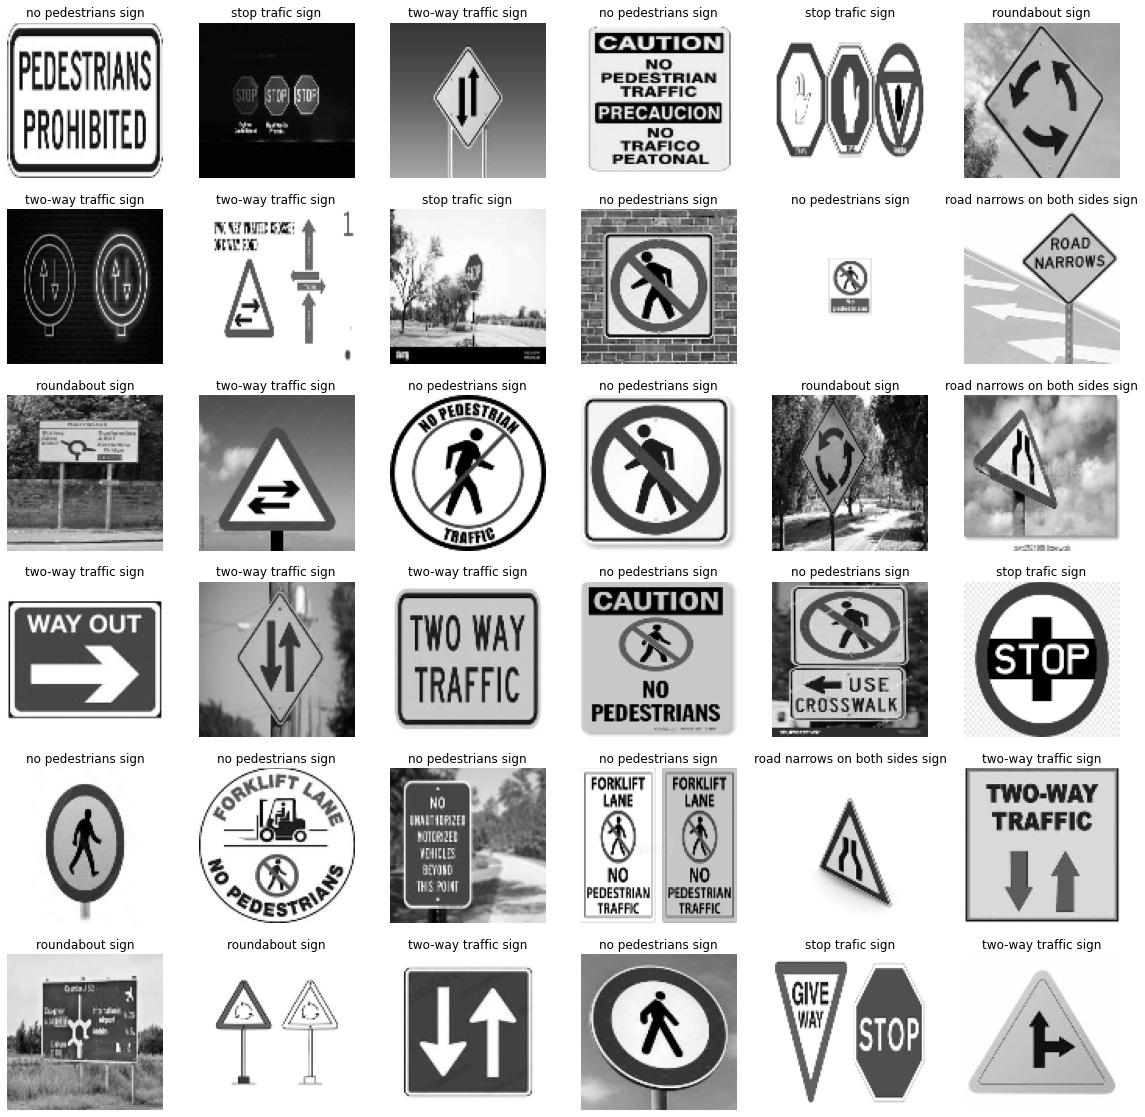

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) :       # print any 36 images from X_train images.
    plt.subplot(6,6,n+1)
    plt.imshow(X[i], cmap= 'gray')   
    plt.axis('off')
    plt.title(getcode(y[i]))

________

# Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [ ]:
# # must convert [X] & [y] to numpy array before train model.
X = np.array(X)
y = np.array(y)

print(f' X shape is:  {X.shape} ')
print(f' y shape is:  {y.shape} ')


 X shape is:  (773, 100, 100) 
 y shape is:  (773,) 


In [ ]:
# as shown in the above cell code, the (X) isn't expanded ( Channel يعني مش متضاف ليها ال) so we will add channel by ---->  np.expand_dim()

X= np.expand_dims(X, axis=-1)               # Equivalent to X[:,:,np.newaxis]
print(f' X shape is:  {X.shape} ')          # as shown the channel has been added 

 X shape is:  (773, 100, 100, 1) 


In [ ]:
# Split the train and the test set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# Split the test and the validation set for the fitting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state= 42)


In [ ]:
print(f' X_train shape is:  {X_train.shape} ')
print(f' y_train shape is:  {y_train.shape} ')
print(f' X_test shape is:  {X_test.shape} ')
print(f' y_test shape is:  {y_test.shape} ')
print(f' X_val shape is:  {X_val.shape} ')
print(f' y_val shape is:  {y_val.shape} ')

 X_train shape is:  (618, 100, 100, 1) 
 y_train shape is:  (618,) 
 X_test shape is:  (77, 100, 100, 1) 
 y_test shape is:  (77,) 
 X_val shape is:  (78, 100, 100, 1) 
 y_val shape is:  (78,) 


### now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [ ]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (s,s,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [ ]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

so how the model looks like ? 

In [ ]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 100, 100, 32)      832       
                                                                 
 conv2d_27 (Conv2D)          (None, 100, 100, 32)      25632     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 50, 50, 64)        36928     
                                 

#### We will fit the model again with data augmentation

## 3.3 Data augmentation 

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. 

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

The improvement is important : 
   - Without data augmentation i obtained an accuracy of 98.114%
   - With data augmentation i achieved 99.67% of accuracy

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
          featurewise_center=False,             # set input mean to 0 over the dataset
          samplewise_center=False,              # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,   # divide each input by its std
          zca_whitening=False,                  # apply ZCA whitening
          rotation_range=10,                    # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                     # Randomly zoom image 
          width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,                # randomly flip images
          vertical_flip=False)                  # randomly flip images


datagen.fit(X_train)

In [ ]:
MODEL_NUM= 2

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',  patience=15, mode='min')

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience= 7, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

mc = ModelCheckpoint('/content/drive/MyDrive/CNN Examples/5Classes_Traffic Sign_augmentation'+str(MODEL_NUM)+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


For the data augmentation, i choosed to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [ ]:
batch_size = 32
callback= [early_stopping, learning_rate_reduction, mc]

In [ ]:
# Fit the model
History = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = 500, validation_data = (X_val, y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks= callback)

Epoch 1/500
18/19 [===========================>..] - ETA: 0s - loss: 84.3910 - accuracy: 0.2148
Epoch 1: val_loss improved from inf to 1.55625, saving model to /content/drive/MyDrive/CNN Examples/5Classes_Traffic Sign_augmentation3.h5
19/19 [==============================] - 2s 67ms/step - loss: 79.8665 - accuracy: 0.2167 - val_loss: 1.5563 - val_accuracy: 0.3077 - lr: 0.0010
Epoch 2/500
19/19 [==============================] - ETA: 0s - loss: 1.6621 - accuracy: 0.2491
Epoch 2: val_loss improved from 1.55625 to 1.53685, saving model to /content/drive/MyDrive/CNN Examples/5Classes_Traffic Sign_augmentation3.h5
19/19 [==============================] - 1s 55ms/step - loss: 1.6621 - accuracy: 0.2491 - val_loss: 1.5368 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 3/500
19/19 [==============================] - ETA: 0s - loss: 1.5813 - accuracy: 0.2679
Epoch 3: val_loss improved from 1.53685 to 1.49390, saving model to /content/drive/MyDrive/CNN Examples/5Classes_Traffic Sign_augmentation3.h5
19

In [ ]:
model = load_model('/content/drive/MyDrive/CNN Examples/5Classes_Traffic Sign_augmentation'+str(MODEL_NUM)+'.h5')

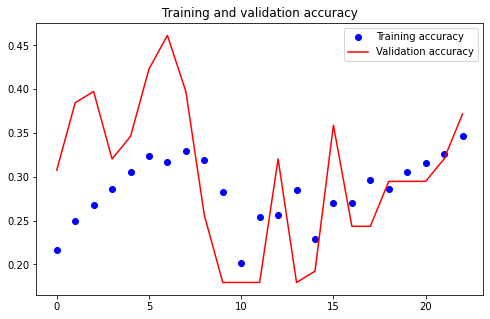

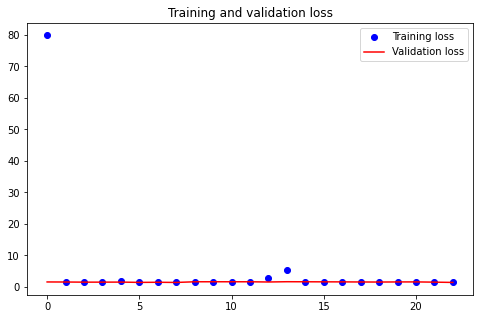

In [ ]:
accuracy = History.history['accuracy']
val_accuracy = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, val_accuracy, 'r')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'r')
plt.title('Training and validation loss')
plt.legend(['Training loss', 'Validation loss' ])
plt.show()

## Accuracy & loss of ***Training***

In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}'.format(loss))
print('Train Accuracy: {}'.format(acc))

Train loss: 0.7487009763717651
Train Accuracy: 0.7297734618186951


## Accuracy & loss of ***Validation***

In [ ]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Prediction loss: {}'.format(loss))
print('Prediction Accuracy: {}'.format(acc))

Prediction loss: 0.9449244737625122
Prediction Accuracy: 0.6153846383094788


## Accuracy & loss of ***Testing***

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Final_Test loss: {}'.format(loss))
print('Final_Test Accuracy: {}'.format(acc))

Final_Test loss: 1.189509630203247
Final_Test Accuracy: 0.5974025726318359


how is the final loss & accuracy



_______

now to predict X test

In [152]:
y_pred = model.predict(X_test)

print('Prediction Shape is: ', y_pred.shape)

Prediction Shape is:  (77, 5)


and to show random redicted pictures & its predicting category


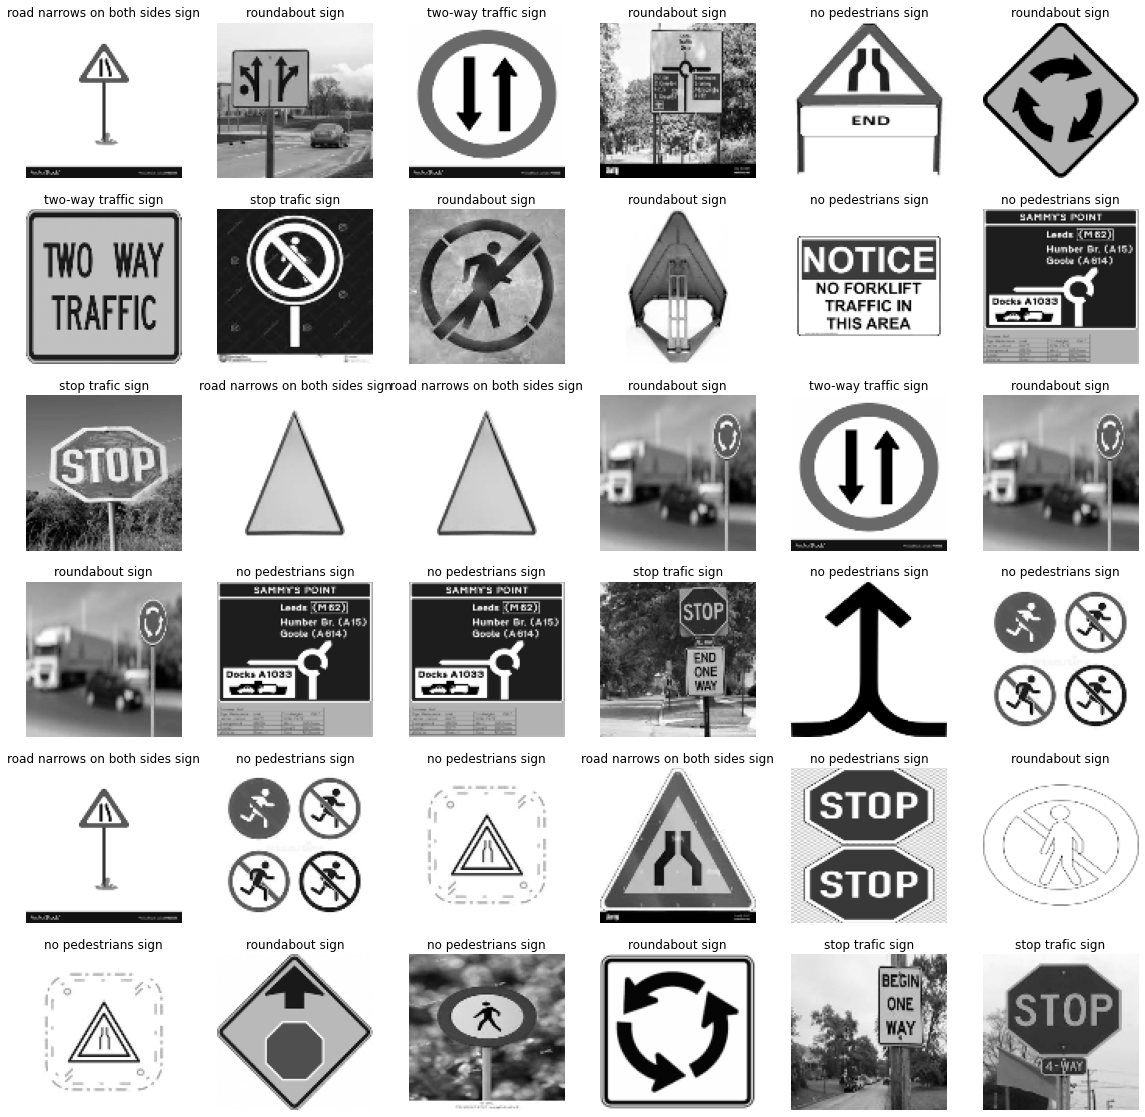

In [153]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i].reshape(s, s), cmap= 'gray')    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))

_________________

In [160]:
labels= list(range(5))           # 6 classes
classes_name= names

## ***Train*** Prediction

In [161]:
predict_x = model.predict(X_train) 
y_train_predict = np.argmax(predict_x, axis=1)

## Train ***Confusion Matrix***:

Text(50.99999999999999, 0.5, 'Real')

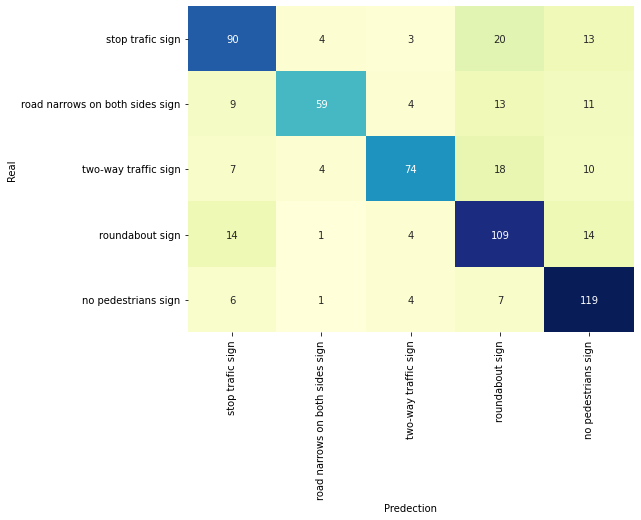

In [162]:
cmat = confusion_matrix(y_train, y_train_predict, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=classes_name, yticklabels=classes_name);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Train*** Report

In [163]:
print(classification_report(y_train, y_train_predict))


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       130
           1       0.86      0.61      0.72        96
           2       0.83      0.65      0.73       113
           3       0.65      0.77      0.71       142
           4       0.71      0.87      0.78       137

    accuracy                           0.73       618
   macro avg       0.75      0.72      0.73       618
weighted avg       0.74      0.73      0.73       618



_____________________________________
_____________________________________

## ***Validation*** Prediction

In [164]:
predict_x = model.predict(X_val) 
y_val_predict = np.argmax(predict_x, axis=1)

## Validation ***Confusion Matrix***:

Text(50.99999999999999, 0.5, 'Real')

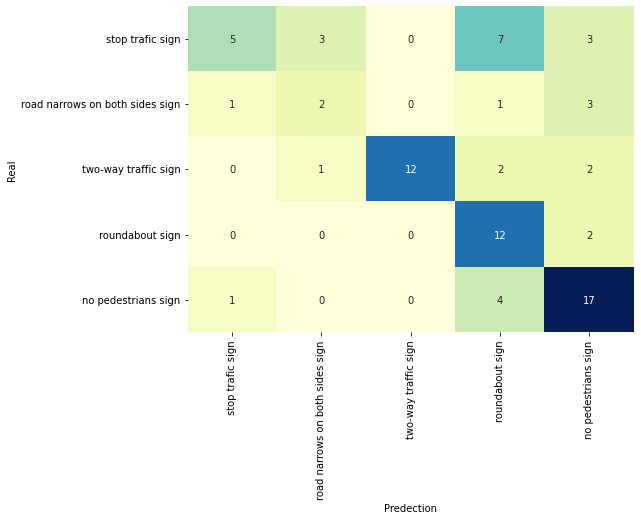

In [165]:
cmat = confusion_matrix(y_val, y_val_predict, labels= labels)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=classes_name, yticklabels=classes_name);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Validation*** Report

In [166]:
print(classification_report(y_val, y_val_predict))


              precision    recall  f1-score   support

           0       0.71      0.28      0.40        18
           1       0.33      0.29      0.31         7
           2       1.00      0.71      0.83        17
           3       0.46      0.86      0.60        14
           4       0.63      0.77      0.69        22

    accuracy                           0.62        78
   macro avg       0.63      0.58      0.57        78
weighted avg       0.67      0.62      0.60        78



_____________________________________
_____________________________________

## ***Test*** Prediction

In [167]:
y_pred = model.predict(X_test)
y_test_predict= np.argmax(y_pred, axis= 1)

## Test ***Confusion Matrix***:

Text(50.99999999999999, 0.5, 'Real')

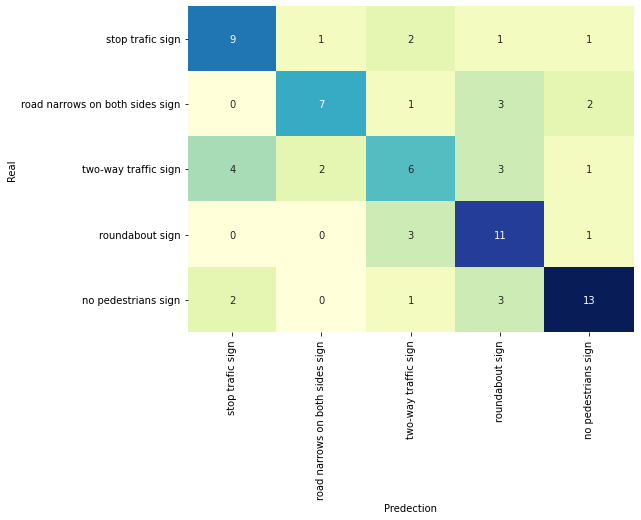

In [168]:
cmat = confusion_matrix(y_test, y_test_predict, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=classes_name, yticklabels=classes_name);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Test*** Report

In [169]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.70      0.54      0.61        13
           2       0.46      0.38      0.41        16
           3       0.52      0.73      0.61        15
           4       0.72      0.68      0.70        19

    accuracy                           0.60        77
   macro avg       0.60      0.59      0.59        77
weighted avg       0.60      0.60      0.59        77

